In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('0730_gold_match_stats_all.csv')

In [3]:
data.head()

,DBNOs,assists,boosts,damageDealt,deathType,gameMode,headshotKills,heals,killPlace,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,timeSurvived,vehicleDestroys,walkDistance,weaponsAcquired,winPlace
0,0,1,1,211.993440,byplayer,squad,0,1,35,0,...,1,3328.0996,0,0.0,0,1172.0,0,2202.41300,5,8
1,1,1,2,77.229996,byplayer,squad,0,0,40,0,...,0,2834.7693,0,0.0,0,930.0,0,1318.96980,5,6
2,0,0,7,149.266050,byplayer,squad,0,1,26,0,...,0,5781.3164,0,0.0,0,1328.0,0,1676.67720,5,1
3,0,0,0,0.000000,byplayer,squad,0,0,62,0,...,1,0.0000,0,0.0,0,187.0,0,138.72804,2,16
4,0,0,0,0.000000,byplayer,squad,0,1,55,0,...,0,3508.7480,0,0.0,0,619.0,0,584.06494,5,17


In [4]:
# 게임에서 튕긴 매치 제거
# 이동거리0 피해량0인 튕긴것같은 매치스텟

logout_index = data[(data["walkDistance"] == 0) & (data["damageDealt"] == 0)].index
data.drop(logout_index, inplace = True)

### Feature Engineering

In [5]:
data["movement_w_mean"] = 0*data["swimDistance"] + 0.78*data["walkDistance"] + 0.22*data["vehicleDestroys"]
data["kill_over_winPlace"] = round(data["killPlace"]/data["winPlace"], 4)
data["kill_over_timeSurvived"] = round(data["kills"]/data["timeSurvived"], 4)
data["longestKill_over_movement_w_mean"] = round(data["longestKill"]/(data["movement_w_mean"]+ 1e-10), 4)
data["timeSurvived_over_weaponsAcquired"] = round(data["timeSurvived"]/(data["weaponsAcquired"]+ 1e-10), 4)


In [10]:
data

,DBNOs,assists,boosts,damageDealt,deathType,gameMode,headshotKills,heals,killPlace,killStreaks,...,timeSurvived,vehicleDestroys,walkDistance,weaponsAcquired,winPlace,movement_w_mean,kill_over_winPlace,kill_over_timeSurvived,longestKill_over_movement_w_mean,timeSurvived_over_weaponsAcquired
0,0,1,1,211.993440,byplayer,squad,0,1,35,0,...,1172.0,0,2202.41300,5,8,1717.882140,4.3750,0.0000,0.0000,234.4000
1,1,1,2,77.229996,byplayer,squad,0,0,40,0,...,930.0,0,1318.96980,5,6,1028.796444,6.6667,0.0000,0.0000,186.0000
2,0,0,7,149.266050,byplayer,squad,0,1,26,0,...,1328.0,0,1676.67720,5,1,1307.808216,26.0000,0.0000,0.0000,265.6000
3,0,0,0,0.000000,byplayer,squad,0,0,62,0,...,187.0,0,138.72804,2,16,108.207871,3.8750,0.0000,0.0000,93.5000
4,0,0,0,0.000000,byplayer,squad,0,1,55,0,...,619.0,0,584.06494,5,17,455.570653,3.2353,0.0000,0.0000,123.8000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71064,2,1,14,431.533540,byplayer,squad,0,4,5,2,...,1396.0,0,1404.00820,5,5,1095.126396,1.0000,0.0021,0.0864,279.2000
71065,2,0,5,269.941280,byplayer,squad,0,0,23,1,...,1232.0,0,1788.07690,4,8,1394.699982,2.8750,0.0008,0.0052,308.0000
71066,1,0,6,285.584470,byplayer,squad,0,0,14,1,...,1006.0,0,1297.28420,9,11,1011.881676,1.2727,0.0020,0.3121,111.7778
71067,0,0,1,0.000000,byplayer,squad,0,0,54,0,...,233.0,0,194.89354,3,16,152.016961,3.3750,0.0000,0.0000,77.6667


In [6]:
# gameMode == Squad

data = data[data['gameMode'] == 'squad']
data = data[data['matchType'] == 'competitive']

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52554 entries, 0 to 71068
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   DBNOs                              52554 non-null  int64  
 1   assists                            52554 non-null  int64  
 2   boosts                             52554 non-null  int64  
 3   damageDealt                        52554 non-null  float64
 4   deathType                          52554 non-null  object 
 5   gameMode                           52554 non-null  object 
 6   headshotKills                      52554 non-null  int64  
 7   heals                              52554 non-null  int64  
 8   killPlace                          52554 non-null  int64  
 9   killStreaks                        52554 non-null  int64  
 10  kills                              52554 non-null  int64  
 11  longestKill                        52554 non-null  flo

In [8]:
# playerId, deathType, mapName,  ////// 지운것들 : matchType, match_id, name, gameMode

from sklearn.preprocessing import LabelEncoder
columns = ['deathType', 'mapName', 'playerId']

le = LabelEncoder()

for col in columns :
    le.fit(data[col])
    data[col] = le.transform(data[col])


In [9]:
data = data[data['matchType'] == 'competitive']

In [10]:
data.drop(columns = ['matchType', 'match_id', 'name', 'gameMode'], inplace = True)

In [11]:
data.head()

,DBNOs,assists,boosts,damageDealt,deathType,headshotKills,heals,killPlace,killStreaks,kills,...,timeSurvived,vehicleDestroys,walkDistance,weaponsAcquired,winPlace,movement_w_mean,kill_over_winPlace,kill_over_timeSurvived,longestKill_over_movement_w_mean,timeSurvived_over_weaponsAcquired
0,0,1,1,211.993440,1,0,1,35,0,0,...,1172.0,0,2202.41300,5,8,1717.882140,4.3750,0.0,0.0,234.4
1,1,1,2,77.229996,1,0,0,40,0,0,...,930.0,0,1318.96980,5,6,1028.796444,6.6667,0.0,0.0,186.0
2,0,0,7,149.266050,1,0,1,26,0,0,...,1328.0,0,1676.67720,5,1,1307.808216,26.0000,0.0,0.0,265.6
3,0,0,0,0.000000,1,0,0,62,0,0,...,187.0,0,138.72804,2,16,108.207871,3.8750,0.0,0.0,93.5
4,0,0,0,0.000000,1,0,1,55,0,0,...,619.0,0,584.06494,5,17,455.570653,3.2353,0.0,0.0,123.8


<AxesSubplot:>

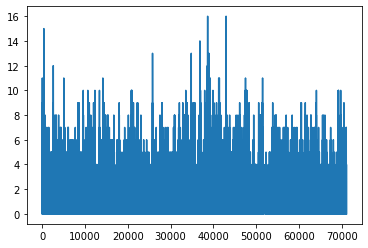

In [12]:
data['kills'].plot()

In [12]:
data.columns

Index(['DBNOs', 'assists', 'boosts', 'damageDealt', 'deathType',
       'headshotKills', 'heals', 'killPlace', 'killStreaks', 'kills',
       'longestKill', 'mapName', 'playerId', 'revives', 'rideDistance',
       'roadKills', 'swimDistance', 'teamKills', 'timeSurvived',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPlace',
       'movement_w_mean', 'kill_over_winPlace', 'kill_over_timeSurvived',
       'longestKill_over_movement_w_mean',
       'timeSurvived_over_weaponsAcquired'],
      dtype='object')

In [28]:
data.head()

,DBNOs,assists,boosts,damageDealt,deathType,headshotKills,heals,killPlace,killStreaks,kills,...,vehicleDestroys,walkDistance,weaponsAcquired,winPlace,movement_w_mean,kill_over_winPlace,kill_over_timeSurvived,longestKill_over_movement_w_mean,timeSurvived_over_weaponsAcquired,KA
0,0,1,1,211.993440,1,0,1,35,0,0,...,0,2202.41300,5,8,1717.882140,4.3750,0.0,0.0,234.4,1
1,1,1,2,77.229996,1,0,0,40,0,0,...,0,1318.96980,5,6,1028.796444,6.6667,0.0,0.0,186.0,2
2,0,0,7,149.266050,1,0,1,26,0,0,...,0,1676.67720,5,1,1307.808216,26.0000,0.0,0.0,265.6,0
3,0,0,0,0.000000,1,0,0,62,0,0,...,0,138.72804,2,16,108.207871,3.8750,0.0,0.0,93.5,0
4,0,0,0,0.000000,1,0,1,55,0,0,...,0,584.06494,5,17,455.570653,3.2353,0.0,0.0,123.8,0


In [13]:
data['KA'] =  data['DBNOs']+ data['kills'] + data['assists']

In [15]:
data.drop(columns = ['DBNOs', 'kills', 'assists'], inplace = True)

In [14]:
data.head()

,DBNOs,assists,boosts,damageDealt,deathType,headshotKills,heals,killPlace,killStreaks,kills,...,vehicleDestroys,walkDistance,weaponsAcquired,winPlace,movement_w_mean,kill_over_winPlace,kill_over_timeSurvived,longestKill_over_movement_w_mean,timeSurvived_over_weaponsAcquired,KA
0,0,1,1,211.993440,1,0,1,35,0,0,...,0,2202.41300,5,8,1717.882140,4.3750,0.0,0.0,234.4,1
1,1,1,2,77.229996,1,0,0,40,0,0,...,0,1318.96980,5,6,1028.796444,6.6667,0.0,0.0,186.0,2
2,0,0,7,149.266050,1,0,1,26,0,0,...,0,1676.67720,5,1,1307.808216,26.0000,0.0,0.0,265.6,0
3,0,0,0,0.000000,1,0,0,62,0,0,...,0,138.72804,2,16,108.207871,3.8750,0.0,0.0,93.5,0
4,0,0,0,0.000000,1,0,1,55,0,0,...,0,584.06494,5,17,455.570653,3.2353,0.0,0.0,123.8,0


In [16]:
data.drop(columns = ['deathType', 'playerId', 'rideDistance', 'swimDistance', 'teamKills', 'walkDistance'], inplace = True)

In [17]:
data.head()

,boosts,damageDealt,headshotKills,heals,killPlace,killStreaks,longestKill,mapName,revives,roadKills,timeSurvived,vehicleDestroys,weaponsAcquired,winPlace,movement_w_mean,kill_over_winPlace,kill_over_timeSurvived,longestKill_over_movement_w_mean,timeSurvived_over_weaponsAcquired,KA
0,1,211.993440,0,1,35,0,0.0,1,1,0,1172.0,0,5,8,1717.882140,4.3750,0.0,0.0,234.4,1
1,2,77.229996,0,0,40,0,0.0,1,0,0,930.0,0,5,6,1028.796444,6.6667,0.0,0.0,186.0,2
2,7,149.266050,0,1,26,0,0.0,1,0,0,1328.0,0,5,1,1307.808216,26.0000,0.0,0.0,265.6,0
3,0,0.000000,0,0,62,0,0.0,1,1,0,187.0,0,2,16,108.207871,3.8750,0.0,0.0,93.5,0
4,0,0.000000,0,1,55,0,0.0,0,0,0,619.0,0,5,17,455.570653,3.2353,0.0,0.0,123.8,0


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52554 entries, 0 to 71068
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   boosts                             52554 non-null  int64  
 1   damageDealt                        52554 non-null  float64
 2   headshotKills                      52554 non-null  int64  
 3   heals                              52554 non-null  int64  
 4   killPlace                          52554 non-null  int64  
 5   killStreaks                        52554 non-null  int64  
 6   longestKill                        52554 non-null  float64
 7   mapName                            52554 non-null  int32  
 8   revives                            52554 non-null  int64  
 9   roadKills                          52554 non-null  int64  
 10  timeSurvived                       52554 non-null  float64
 11  vehicleDestroys                    52554 non-null  int

In [20]:
data['KA'].value_counts()

0     20834
2      7922
1      7696
3      4420
4      3492
5      2395
6      1755
7      1237
8       805
9       577
10      436
11      255
12      204
13      143
14      103
15       89
16       63
17       37
18       29
19       20
21       15
20       12
Name: KA, dtype: int64

In [19]:
data = data[data['KA'] < 22 ]

In [21]:
data.head()

,boosts,damageDealt,headshotKills,heals,killPlace,killStreaks,longestKill,mapName,revives,roadKills,timeSurvived,vehicleDestroys,weaponsAcquired,winPlace,movement_w_mean,kill_over_winPlace,kill_over_timeSurvived,longestKill_over_movement_w_mean,timeSurvived_over_weaponsAcquired,KA
0,1,211.993440,0,1,35,0,0.0,1,1,0,1172.0,0,5,8,1717.882140,4.3750,0.0,0.0,234.4,1
1,2,77.229996,0,0,40,0,0.0,1,0,0,930.0,0,5,6,1028.796444,6.6667,0.0,0.0,186.0,2
2,7,149.266050,0,1,26,0,0.0,1,0,0,1328.0,0,5,1,1307.808216,26.0000,0.0,0.0,265.6,0
3,0,0.000000,0,0,62,0,0.0,1,1,0,187.0,0,2,16,108.207871,3.8750,0.0,0.0,93.5,0
4,0,0.000000,0,1,55,0,0.0,0,0,0,619.0,0,5,17,455.570653,3.2353,0.0,0.0,123.8,0


In [22]:
train = data.iloc[:, :-1]
test = pd.DataFrame(data.iloc[:, -1])

In [25]:
test.head(10)

,KA
0,1
1,2
2,0
3,0
4,0
5,0
6,2
7,2
8,0
17,2


In [26]:
test.value_counts() # category를 어떻게 나눌까?

KA
0     20834
2      7922
1      7696
3      4420
4      3492
5      2395
6      1755
7      1237
8       805
9       577
10      436
11      255
12      204
13      143
14      103
15       89
16       63
17       37
18       29
19       20
21       15
20       12
dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(train,
                                                   test,
                                                   test_size = 0.2,
                                                   stratify=test,
                                                   random_state = 1234)

### KFold

In [98]:
from sklearn.model_selection import KFold

In [99]:
kfold = KFold(n_splits =5, random_state = 1234, shuffle = True)

# lightGBM

In [101]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV

In [94]:
LGB_clf = LGBMClassifier(random_state = 1234, n_jobs = -1)

In [96]:
parameters={
    "n_estimators" : [ 100,200,300,500,1000],
    "learning_rate":[0.1,0.2,0.3,0.4,0.5,0.6] # 해당하는 파라미터 조합이 아니면 패스한다. 무시해버린 느낌.
}

In [102]:
n_iter_search = 10
# 세팅!!!아직 학습은 아님!!!!!!
lgbm_rgs = RandomizedSearchCV(LGB_clf,
                            param_distributions=parameters,
                             cv = kfold,
                             scoring="accuracy",
                             n_jobs=-1,
                             random_state=1234,
                             n_iter=n_iter_search,
                             verbose = 2
                            )
lgbm_rgs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\TFG5076XG\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1234, shuffle=True),
                   estimator=LGBMClassifier(random_state=1234), n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5, 0.6],
                                        'n_estimators': [100, 200, 300, 500,
                                                         1000]},
                   random_state=1234, scoring='accuracy', verbose=2)

In [103]:
lgbm_rgs.best_score_

0.3245983280816851

In [104]:
# X_test를 할 때에도 명확히 어레이로 변환을 하고 할 것!!!!!!
lgbm_rgs_best = lgbm_rgs.best_estimator_
lgbm_rgs_pred = lgbm_rgs_best.predict(np.ascontiguousarray(X_test))
lgbm_rgs_accuracy = accuracy_score(y_test, lgbm_rgs_pred)
print("LightGGB에서 best모델로 X_test한 정확도 : {}".format(lgbm_rgs_accuracy))

LightGGB에서 best모델로 X_test한 정확도 : 0.124857251617815


In [115]:
!pip install pycaret

In [116]:
from pycaret.classification import *

ImportError: cannot import name '_raise_dep_warning_if_not_pytest' from 'sklearn.utils.deprecation' (C:\Users\TFG5076XG\anaconda3\lib\site-packages\sklearn\utils\deprecation.py)